# Seaborn for Data Visualization 


### Agenda/Topics:
    - Go through some of the major plotting methods.
    - Focus: Code walkthrough, Code-composition, dealing with errors.
    - NOTE: Seaborn is built on top of Matplotlib to simplify plotting.

### Pre-requisites:
    - Python basics.
    - Exploratory Data Anlaysis.

### References:
    - https://seaborn.pydata.org/
    - https://seaborn.pydata.org/api.html

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

# sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)

## 1. Scatterplot

In [2]:
# Load the sample mpg dataset
# Source: https://github.com/mwaskom/seaborn-data/blob/master/mpg.csv
mpg = sns.load_dataset("mpg") # using sns.load_dataset command to directly load table from sns
print(type(mpg))

<class 'pandas.core.frame.DataFrame'>


In [3]:
# print first few rows of the data

mpg.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,usa,ford galaxie 500
6,14.0,8,454.0,220.0,4354,9.0,70,usa,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,usa,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,usa,pontiac catalina
9,15.0,8,390.0,190.0,3850,8.5,70,usa,amc ambassador dpl


In [ ]:
'''
# pretty print DataFrame
# Reference - https://pypi.org/project/tabulate/
from tabulate import tabulate
print(tabulate(mpg, headers = 'keys', tablefmt = 'github'))
'''

In [4]:
# shape of the dataframe 
mpg.shape

(398, 9)

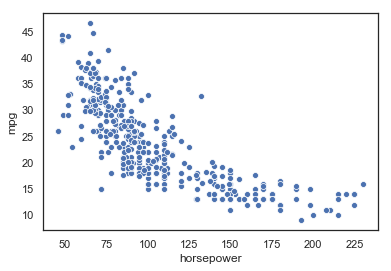

In [5]:
# Plot miles per gallon against horsepower scatterplot

sns.set(style = 'white')
sns.scatterplot(x = 'horsepower', y = 'mpg', data = mpg)

Note that 'grid' is very important for readability of a plot.

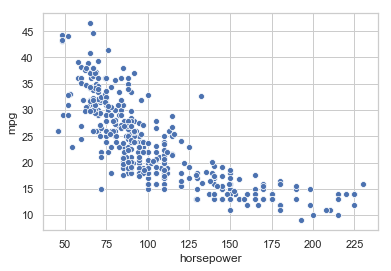

In [6]:
# setting style = 'whitegrid'

sns.set(style = 'whitegrid')
sns.scatterplot(x = 'horsepower', y = 'mpg', data = mpg)

> Observations: 
    - In general, as horsepower increases, miles-per-gallon decreases.
    - At initial stage with increase in HP, the mpg falls drastically. 
      Beyond ~ 125 HP, the reduction in mpg is not as much. 

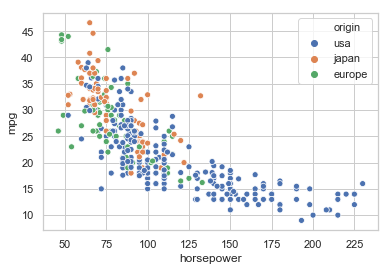

In [8]:
# plotting different colored points for different countries/origin

sns.scatterplot(x = 'horsepower', y = 'mpg', data = mpg, hue = 'origin')

> Observations:
    - Cars manufactured in Europe and Japan have horsepower less than 127 mph and are comparatively more 
      fuel-efficient. 

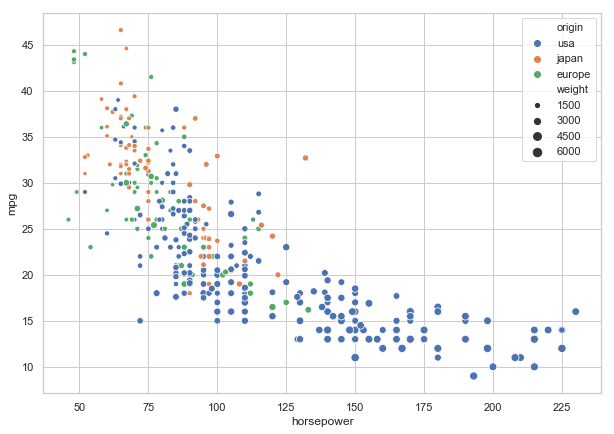

In [9]:
# incorporate the weight of the cars feature into the same plot
# we'll handle this using 'size' parameter of seaborn such that size of each point proportional to the weight of car

plt.figure(figsize = (10, 7)) 
sns.scatterplot(x = 'horsepower', y = 'mpg', data = mpg, hue = 'origin', size = 'weight')

> Observations:
    - Cars having engines of high HP in general tend to be heavier as compared to the cars with low HP. 
    - Also from what we have seen earlier, heavier cars tend to have less fuel efficiency. 

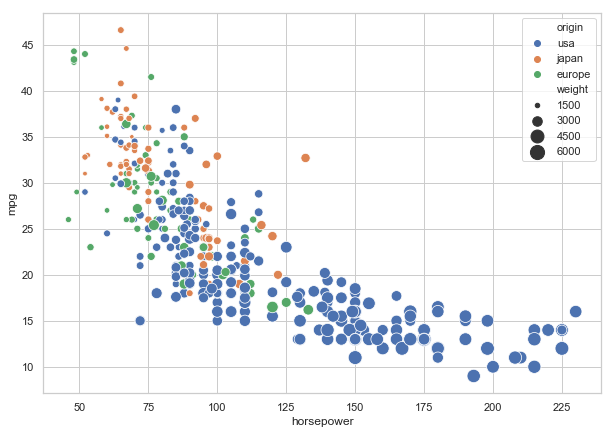

In [10]:
# custom-sizes for each bubble 

plt.figure(figsize = (10, 7)) 
sns.scatterplot(x = 'horsepower', y = 'mpg', data = mpg, hue = 'origin', size = 'weight', sizes = (20, 200))

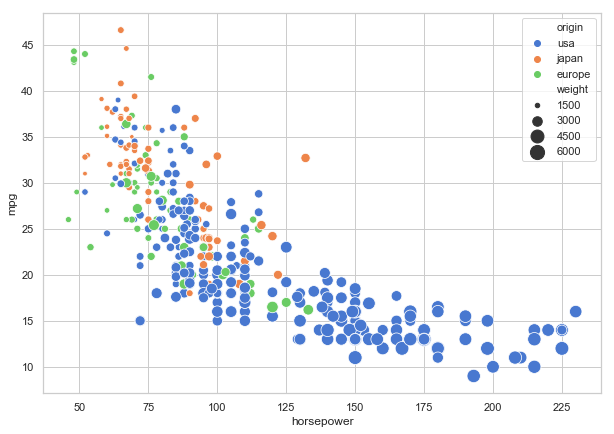

In [11]:
# with different color palette 
# palette = 'muted' 

plt.figure(figsize = (10, 7)) 
sns.scatterplot(x = 'horsepower', y = 'mpg', data = mpg, hue = 'origin', size = 'weight', sizes = (20, 200), palette = 'muted')

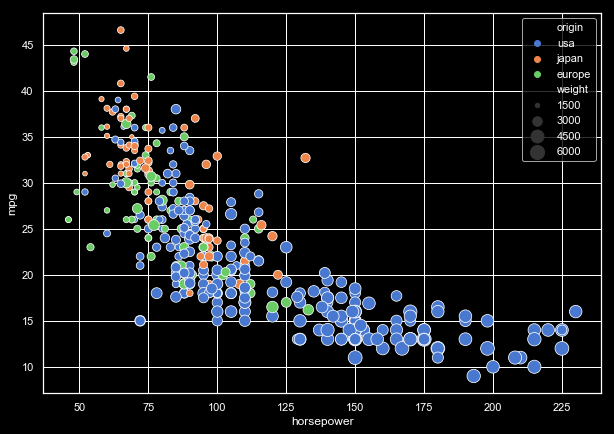

In [53]:
# dark-background

sns.set(style = 'whitegrid')
plt.style.use('dark_background') 
plt.figure(figsize = (10, 7))
sns.scatterplot(x = 'horsepower', y = 'mpg',  data = mpg, hue = 'origin',
               size = 'weight', sizes = (20, 200),  palette = 'muted')

Seaborn is built upon Matplotlib library. It is more aestetic as compared to matplotlib plots. Also, it's quiet efficient to write codes using Seaborn as there are number of in-built parameters. In general, what you can achieve with matplotib by writing multiple lines of codes can be achieved using Seaborn in relatively few lines of code. 

## 2. FacetGrid

- Multi-plot grid for plotting conditional relationships.
- https://seaborn.pydata.org/generated/seaborn.FacetGrid.html

In [56]:
# Load the sample 'tips' dataset and display first few rows
# Source: https://github.com/mwaskom/seaborn-data/blob/master/tips.csv

tips = sns.load_dataset("tips")
print(type(tips))
tips.head(10)

<class 'pandas.core.frame.DataFrame'>


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [57]:
# shape of the dataset

tips.shape

(244, 7)

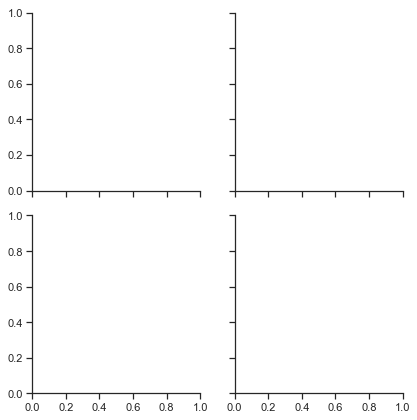

In [71]:
# create a facetgrid  

sns.set(style = 'ticks', color_codes = True)
g = sns.FacetGrid(tips, col = 'time', row = 'smoker') # time and smoker are categorical variables

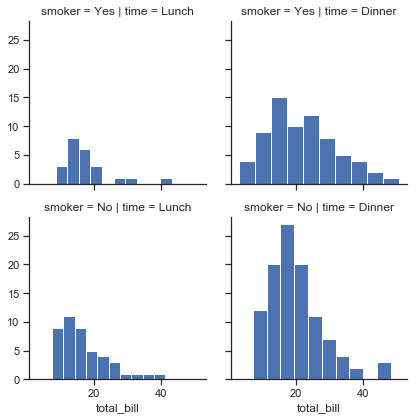

In [75]:
# histogram mapping  

sns.FacetGrid(tips, col = 'time', row = 'smoker').map(plt.hist, 'total_bill')

> Observations:
    - Footfall is high for Dinner is high as compared to Lunch.
    - During dinner time, the frequnecy of people paying bills around 20 dollars is high. 
    - During lunch time, the frequnecy of people paying bills around 15 dollars is high.

In [ ]:
'''
# adjusting bin size 
bins = np.arange(0, 65, 5)
g = sns.FacetGrid(tips, col = 'time',  row = 'smoker')
g.map(plt.hist, 'total_bill', bins = bins)
'''

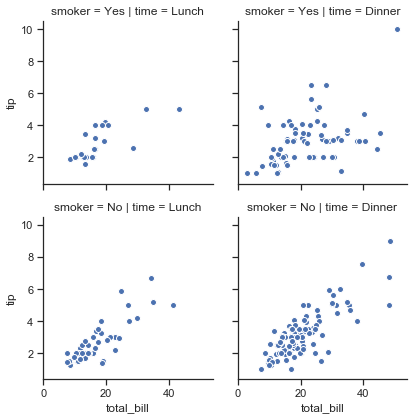

In [84]:
# mapping a scatterplot
sns.FacetGrid(tips, col = 'time', row = 'smoker').map(plt.scatter, 'total_bill', 'tip', edgecolor = 'w')

> Observations:
    - Footfall is high for Dinner is high as compared to Lunch.
    - Tip increases linearly with total bill. This relationshp is more dominant in case of non-smokers.
    - Smokers in general are frugal in tipping as compared to non-smokers.
    - During lunch time, comparatively high number of people pay bill around 20 dollars.
    - During dinner time, comparatively high number of people pay bill around 15 dollars.

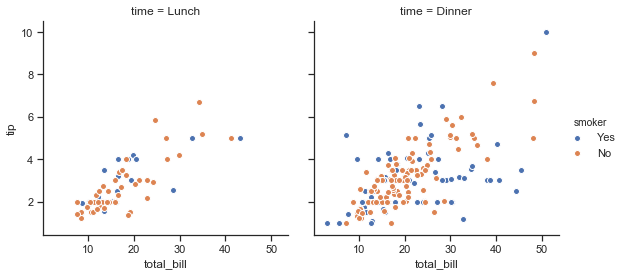

In [99]:
# instead of creating seperate rows for smoker = 'Yes' and smoker = 'No', represent this information using 'hue'
# add legend 

sns.FacetGrid(tips, col = 'time', hue = 'smoker', height = 4).map(plt.scatter, 'total_bill', 'tip', edgecolor = 'w').add_legend()

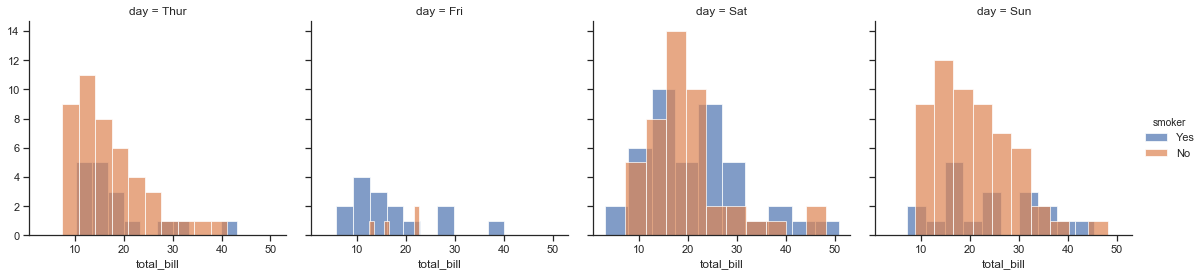

In [117]:
# histogram of 'total bill' instead of scatterplot

sns.FacetGrid(tips, col = 'day', hue = 'smoker', height = 4).map(plt.hist, 'total_bill', alpha = 0.7).add_legend()

> Observation:
    - The footfall is higher on Weekends and Thurday as compared to Friday.
    - More number of non-smokers visit restaurant on any given day. 
    - On Weekends, more people in general tend to spend higher as compared to weekdays.
    - It is observed that among the customers visiting on Friday, majority are smokers. 

Note: Facetgrid facilitate building subplots for the categorical variables in the data.

In [15]:
# load a new 'attention' dataset
# Source: https://github.com/mwaskom/seaborn-data/blob/master/attention.csv
att = sns.load_dataset('attention')
print(tabulate(att, headers = 'keys', tablefmt = 'github'))

|    |   Unnamed: 0 |   subject | attention   |   solutions |   score |
|----|--------------|-----------|-------------|-------------|---------|
|  0 |            0 |         1 | divided     |           1 |     2   |
|  1 |            1 |         2 | divided     |           1 |     3   |
|  2 |            2 |         3 | divided     |           1 |     3   |
|  3 |            3 |         4 | divided     |           1 |     5   |
|  4 |            4 |         5 | divided     |           1 |     4   |
|  5 |            5 |         6 | divided     |           1 |     5   |
|  6 |            6 |         7 | divided     |           1 |     5   |
|  7 |            7 |         8 | divided     |           1 |     5   |
|  8 |            8 |         9 | divided     |           1 |     2   |
|  9 |            9 |        10 | divided     |           1 |     6   |
| 10 |           10 |        11 | focused     |           1 |     6   |
| 11 |           11 |        12 | focused     |           1 |   

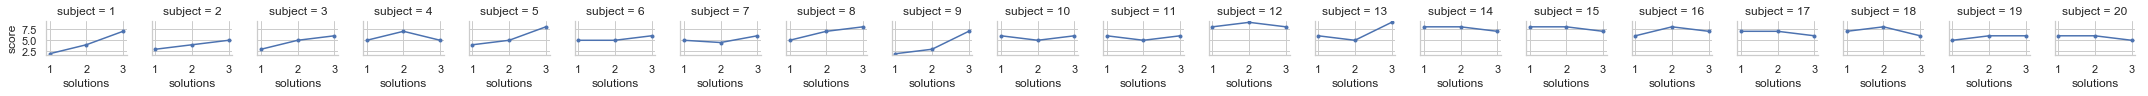

In [18]:
sns.FacetGrid(att, col = 'subject', height = 1.5).map(plt.plot, "solutions", "score", marker=".")

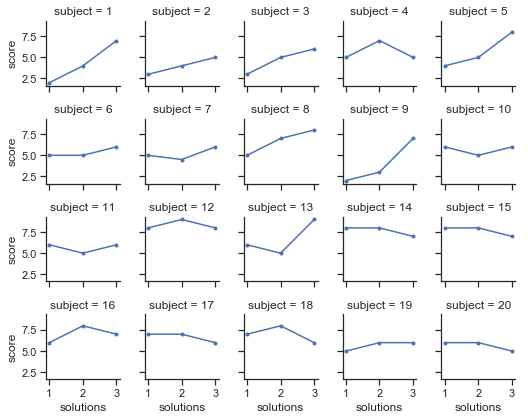

In [21]:
# using column wrap for better display
sns.set_style('ticks')
sns.FacetGrid(att, col = 'subject', col_wrap = 5, height = 1.5).map(plt.plot, 'solutions', 'score', marker = '.')

It is advisable to not make too many plots unless absolutely necessary as it becomes hard to draw conclusions from it. 

## 3. LinePlot

https://seaborn.pydata.org/generated/seaborn.lineplot.html#seaborn.lineplot

In [27]:
import seaborn as sns
from tabulate import tabulate

sns.set(style = 'darkgrid')
# Load an example dataset with long-form data
fmri = sns.load_dataset("fmri")
fmri.head(10)

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
5,s9,18,stim,parietal,-0.103513
6,s8,18,stim,parietal,-0.064408
7,s7,18,stim,parietal,-0.060526
8,s6,18,stim,parietal,-0.007029
9,s5,18,stim,parietal,-0.040557


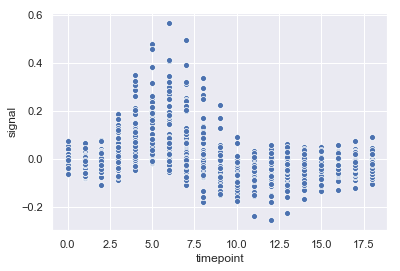

In [29]:
# scatterplot 
sns.scatterplot(x = 'timepoint', y = 'signal', data = fmri)

For the same timepoint we have multiple signal values here. It takes all the values and computes the 95% confidence interval for the data. 

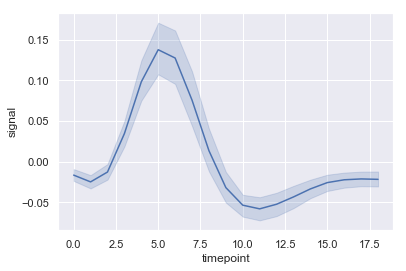

In [28]:
# lineplot
sns.lineplot(x = 'timepoint', y = 'signal', data = fmri)

> Observation
    - The variability is higher at time-point = 5
    - The variability is lower at around time-point = 2.5 and around time-point = 15

In [31]:
'''
np.mean(fmri[fmri['timepoint'] == 5])
'''

timepoint    5.000000
signal       0.137725
dtype: float64

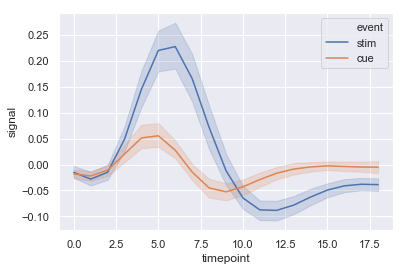

In [30]:
# for different events 

sns.lineplot(x = 'timepoint', y = 'signal', hue = 'event', data = fmri)

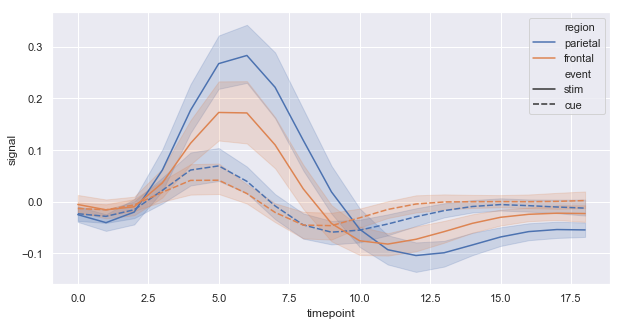

In [36]:
# adding region and event representation 

plt.figure(figsize = (10, 5))
ax = sns.lineplot(x = 'timepoint', y = 'signal', hue = 'region', style = 'event', data = fmri)

## 4. Distribution plots 

- distplot https://seaborn.pydata.org/generated/seaborn.distplot.html
- kdeplot https://seaborn.pydata.org/generated/seaborn.kdeplot.html
- jointplot https://seaborn.pydata.org/generated/seaborn.jointplot.html
    

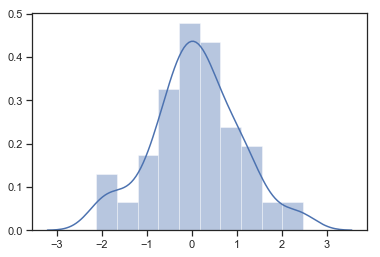

In [37]:
# histogram and smoothed PDF plot
sns.set(style = 'ticks')
np.random.seed(10)
x = np.random.randn(100)
sns.distplot(x)

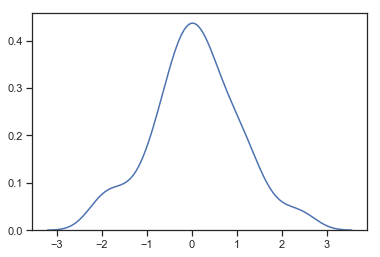

In [39]:
# kdeplot

np.random.seed(10)
x = np.random.randn(100)
sns.kdeplot(x)

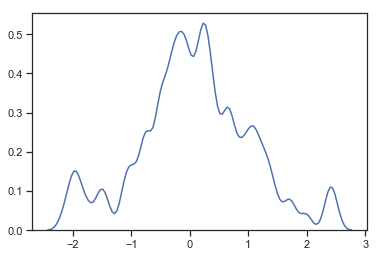

In [41]:
# with different bandwidth: bandwidth = 0.1

sns.kdeplot(x, bw = 0.1)

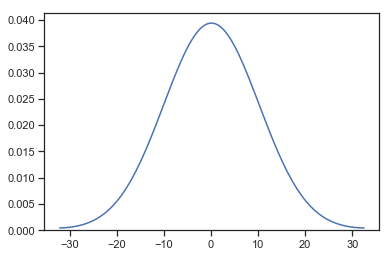

In [43]:
# with different bandwidth: bandwidth = 10

sns.kdeplot(x, bw = 10)

> OBSERVATIONS:
    - The kde plot smoothness changes with change in bandwidth.
    - If the bandwidth is too small, we get a jagged curve.
    - If the bndwidth is large, we get a smoothed curve. 

In [46]:
# JointPlot
# https://seaborn.pydata.org/generated/seaborn.jointplot.html#seaborn.jointplot

# load tips dataset
tips = sns.load_dataset("tips")
tips.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


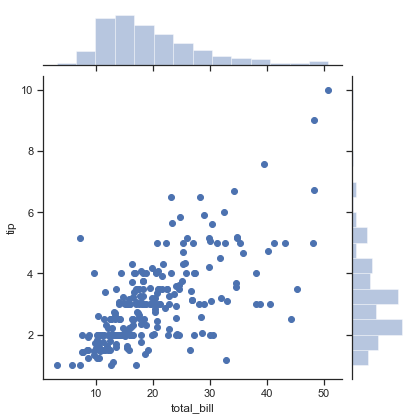

In [47]:
# plotting a default jointplot
sns.jointplot(x = 'total_bill', y = 'tip', data = tips)

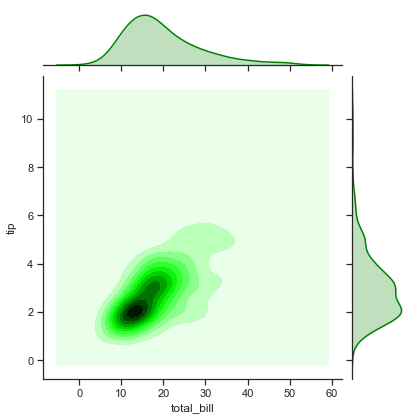

In [55]:
# plotting a contourplot using jointplot 
sns.jointplot(x = 'total_bill', y = 'tip', data = tips, color = 'green', kind = 'kde')

> OBSERVATIONS:
    - Seaborn serve as a good alternative to the 3D plot.
    - Different shade region represented by contours have different density of points.
    - Samples lying withing the same shade region have the same probability density. 
    - Darker region represent high density of samples i.e. the probability density is high. 
    - Lighter region indicates low density of samples i.e. the probability density is less.

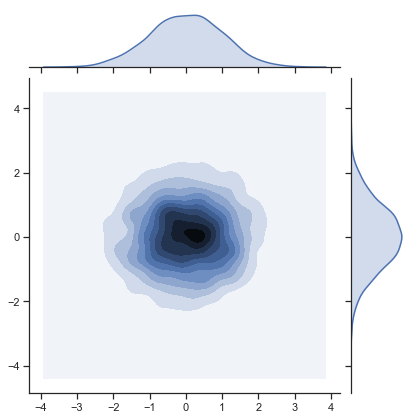

In [61]:
# randomly generated normally distributed datasets

x, y = np.random.randn(2, 3000)
sns.jointplot(x, y, kind = "kde")

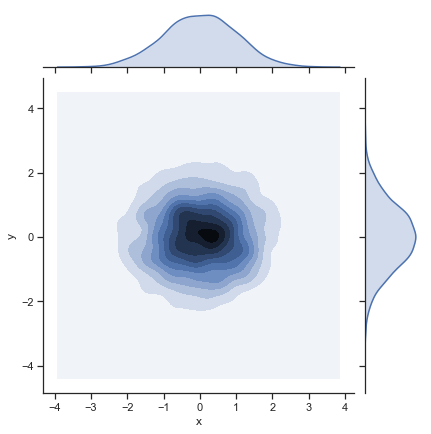

In [66]:
# setting axes labels

sns.jointplot(x, y, kind = 'kde').set_axis_labels("x", "y")